# Code for Chart Creation
*Including Calculation of Regularization Paths*

### Predictions, Errors and Forecast Charts

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

            AR   GP  BLR   EN  Ridge
MSE   0.244986  0.0  0.0  0.0    0.0
RMSE  0.494961  0.0  0.0  0.0    0.0
MAE   0.382323  0.0  0.0  0.0    0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\ticker.py:1458: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._converter.PandasAutoDateLocator'>
  str(type(self)))


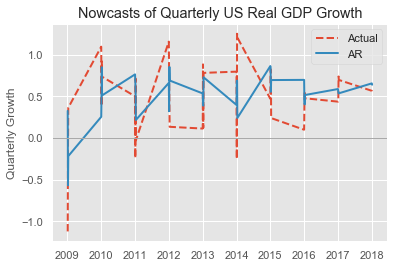

In [33]:
#imports
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import ElasticNet, enet_path, lasso_path, Ridge
from sklearn.datasets import make_regression
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima_model import ARMA
import datetime 
from itertools import cycle
from datetime import datetime
import matplotlib.dates as dt
import matplotlib.axes as ax
import matplotlib

#Reading in data
gdp = pd.read_csv('gdp_growth.csv')
gdp_value = gdp.value

#Defining time periods
start = datetime(2009,4,1)
end = datetime(2018,4,1)
first = np.where(gdp.date == start.strftime('%#d/%m/%y'))
last = np.where(gdp.date == end.strftime('%#d/%m/%y'))

first = int(np.array(first, dtype=float))
last = int(np.array(last, dtype=float))

length = last - first + 1

#Creating dataframe to store results
a = np.zeros(shape=(length,7))
model = pd.DataFrame(a,columns=['Date','Actual','AR', 'GP', 'BLR', 'EN', 'Ridge'])
model['Actual'] = gdp.loc[first:last, 'value'].values
model.loc[:,'Actual'] *= 100 
model.Date = gdp.loc[first:last, 'date'].values

#Forecast loop for various models
for i in range(first,last + 1):
    mod = ARMA(gdp_value.iloc[:i-1], order=(1,0))
    AR_model_fit = mod.fit(transparams=False)
    model.AR[i-first] = float(AR_model_fit.forecast(1)[0])
    
#Transforming for visual reasons
model.loc[:,'AR'] *= 100 

#Plotting
model.Date = dt.datestr2num(model.Date)

plt.style.use('ggplot')

plt.plot_date('Date', 'Actual', fmt='', data=model, linewidth=2, linestyle='dashed')
plt.plot_date('Date', 'AR', fmt='', data=model, linewidth=2)
plt.title('Nowcasts of Quarterly US Real GDP Growth')
plt.ylabel('Quarterly Growth')
plt.axhline(linewidth=1, color='darkgrey')
plt.locator_params(axis='x',tight=True, nbins=4)
plt.legend()

#Calculating and storing errors
column_names = ['AR', 'GP', 'BLR', 'EN', 'Ridge']
row_names    = ['MSE', 'RMSE', 'MAE']
a = np.zeros(shape=(3, 5))
errors = pd.DataFrame(a, columns=column_names, index=row_names)

errors.loc['MSE','AR'] = mean_squared_error(model.Actual, model.AR)
errors.loc['RMSE','AR'] = sqrt(mean_squared_error(model.Actual, model.AR))
errors.loc['MAE', 'AR'] = mean_absolute_error(model.Actual, model.AR)

print(errors)



### Major Forecast Charts

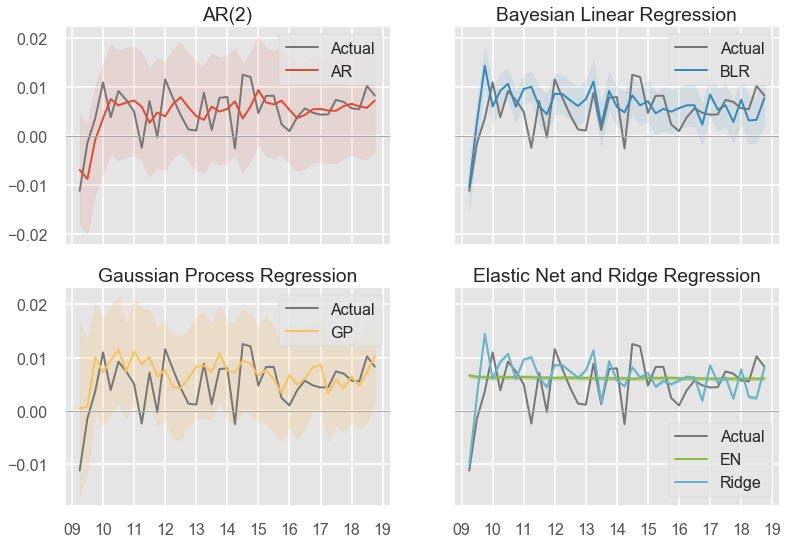

In [35]:
plt.style.use('seaborn-poster')
import seaborn as sns

pred = pd.read_csv('predictions2.csv')

pred.loc[:,'AR_std'] *= 1.96 
pred.loc[:,'GP_std'] *= 1.96 
pred.loc[:,'BLR_std'] *= 1.96 
pred.loc[:,'EN_std'] *= 1.96 
pred.loc[:,'Ridge_std'] *= 1.96 

from matplotlib.dates import DateFormatter
pred.Date = dt.datestr2num(pred.Date)
myFmt = DateFormatter("%y") 

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax1.plot_date('Date', 'AR', fmt='', data=pred, linewidth=2, color='#e24a33')
ax1.fill_between(pred.Date, pred.AR - pred.AR_std, pred.AR + pred.AR_std, color='#e24a33', alpha=0.1)
ax1.set_title('AR(2)')
ax1.axhline(linewidth=1, color='darkgrey')
ax1.legend()

ax2.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax2.plot_date('Date', 'BLR', fmt='', data=pred, linewidth=2, color='#348abd')
ax2.fill_between(pred.Date, pred.BLR - pred.BLR_std, pred.BLR + pred.BLR_std, color='#348abd', alpha=0.1)
ax2.axhline(linewidth=1, color='darkgrey')
ax2.set_title('Bayesian Linear Regression')
ax2.legend()

ax3.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax3.plot_date('Date', 'GP', fmt='', data=pred, linewidth=2, color='#fbc15e')
ax3.fill_between(pred.Date, pred.GP - pred.GP_std, pred.GP + pred.GP_std, color='#fbc15e', alpha=0.2)
ax3.axhline(linewidth=1, color='darkgrey')
ax3.set_title('Gaussian Process Regression')
ax3.legend()
ax4.xaxis.set_major_formatter(myFmt)

ax4.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax4.plot_date('Date', 'EN', fmt='', data=pred, linewidth=2, color='#8eba42')
ax4.fill_between(pred.Date, pred.EN - pred.EN_std, pred.EN + pred.EN_std, color='#8eba42', alpha=0.4)
ax4.plot_date('Date', 'Ridge', fmt='', data=pred, linewidth=2, color='#64b5cd')
ax4.fill_between(pred.Date, pred.Ridge - pred.Ridge_std, pred.Ridge + pred.Ridge_std, color='#64b5cd', alpha=0.4)
ax4.axhline(linewidth=1, color='darkgrey')
ax4.set_title('Elastic Net and Ridge Regression')
ax4.legend()
ax4.xaxis.set_major_formatter(myFmt)


# Turn on the proper x or y axes ticks.
for ax in [ax1, ax2, ax3, ax4]:
    # Hide all ticks and labels
    ax.xaxis.set_major_formatter(myFmt)


f.subplots_adjust(hspace=0.2)
plt.savefig('NowcastPreds.png')



### Regularization Path Charts

In [4]:
import pandas as pd
import statsmodels.api as sm

#%run -i fred_api_key
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import ElasticNet, enet_path, lasso_path, Ridge
from sklearn.datasets import make_regression
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error

from itertools import cycle
from matplotlib.font_manager import FontProperties
from sklearn.linear_model import Ridge

In [7]:
start = datetime(1990, 1, 1)
end = datetime(2019, 4, 1)

params = {'observation_start': start.strftime('%Y-%m-%d'),
          'observation_end': end.strftime('%Y-%m-%d')}


# fitting regression
all_data = pd.read_csv("data2.csv")
X = all_data.drop('date', axis = 1)
gdp_data = pd.read_csv("gdp_growth.csv")

y = pd.DataFrame(gdp_data['value'])

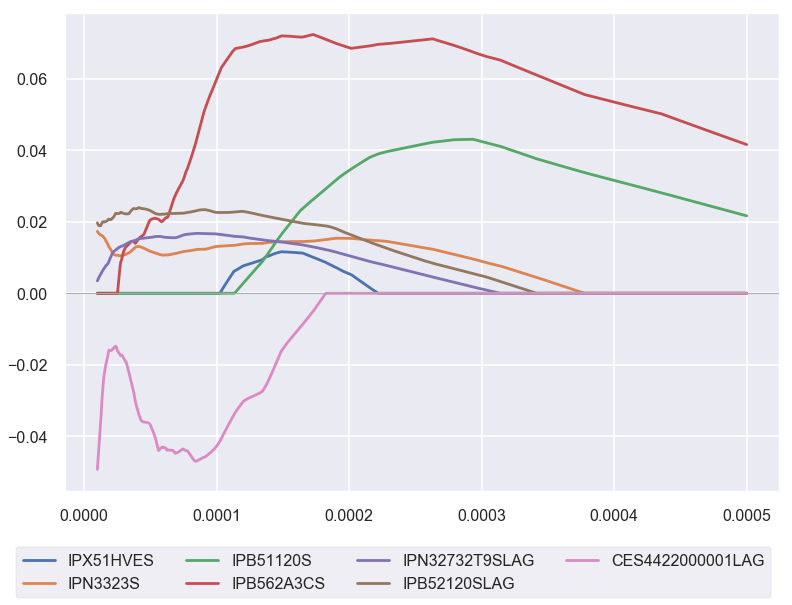

In [50]:
n_alphas = 1000

plt.style.use('seaborn-poster')

plot_DF = pd.DataFrame({'alpha':[0.0]*n_alphas})
for col in X.columns:
   plot_DF[col]=0

alphas = np.linspace(0.00001,0.0005,n_alphas)

plot_DF['alpha'] = alphas
for i in range(n_alphas):
    alpha_i = float(np.array(plot_DF.iloc[i:i+1,0:1]))
    regr = ElasticNet(alpha=alpha_i,l1_ratio=0.5,max_iter=1000, 
                      normalize=True, positive=False)
    temp_fit=regr.fit(X.iloc[:114,:], y.iloc[:114,:])
    plot_DF.iloc[i,1:] = temp_fit.coef_

#plot_DF = plot_DF.iloc[:,1:]

_,ids2plot = np.where(abs(plot_DF.iloc[300:301,:])>=0.01)
plot_DF = plot_DF.iloc[:,ids2plot]
plot_DF['alpha'] = alphas


for col in plot_DF.columns[plot_DF.columns != 'alpha']:
    fig = plt.plot('alpha', col, data = plot_DF)
#fontP = FontProperties()
#fontP.set_size('small')
plt.axhline(linewidth=1, color='darkgrey')
lgd = plt.legend(ncol=4,bbox_to_anchor=(1, -0.1))
plt.savefig('ENRegPath.png',bbox_extra_artists=(lgd,), bbox_inches='tight')


In [47]:
n_alphas = 1000

plt.style.use('seaborn-poster')

plot_DF = pd.DataFrame({'alpha':[0.0]*n_alphas})
for col in X.columns:
   plot_DF[col]=0

alphas = np.linspace(0,10,n_alphas)

plot_DF['alpha'] = alphas
for i in range(n_alphas):
    alpha_i = float(np.array(plot_DF.iloc[i:i+1,0:1]))
    regr = Ridge(alpha=alpha_i,max_iter=1000,
                 normalize=True,fit_intercept=False)
    temp_fit=regr.fit(X.iloc[:114,:], y.iloc[:114,:])
    plot_DF.iloc[i,1:] = temp_fit.coef_[0]


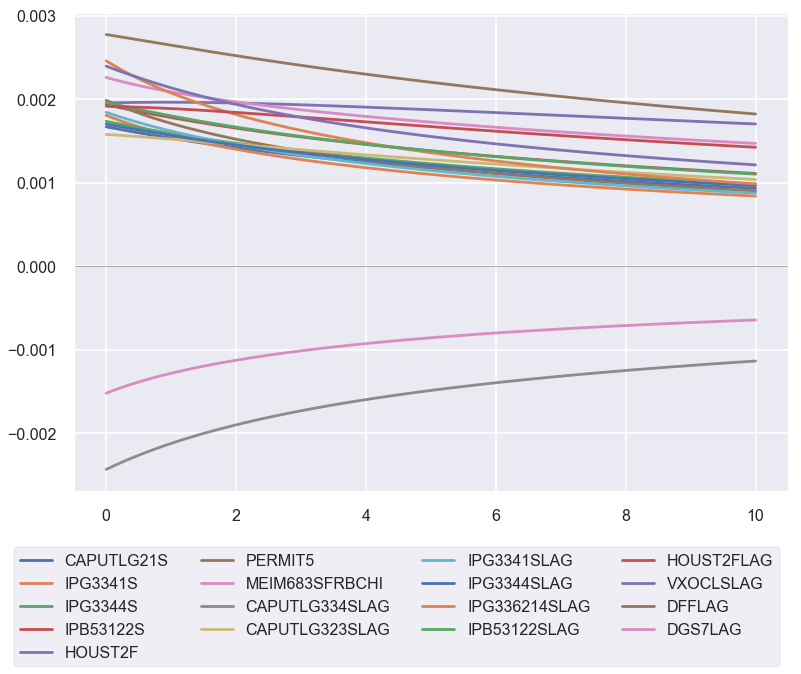

In [49]:
#plot_DF = plot_DF.iloc[:,1:]

_,ids2plot = np.where(abs(plot_DF.iloc[0:1,:])>=0.0015)
plot_DF = plot_DF.iloc[:,ids2plot]
plot_DF['alpha'] = alphas


for col in plot_DF.columns[plot_DF.columns != 'alpha']:
    plt.plot('alpha', col, data = plot_DF)
plt.axhline(linewidth=1, color='darkgrey')
lgd = plt.legend(ncol=4,bbox_to_anchor=(1, -0.1))

plt.savefig('RidgeRegPath.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

### Evolution of Forecasts Chart

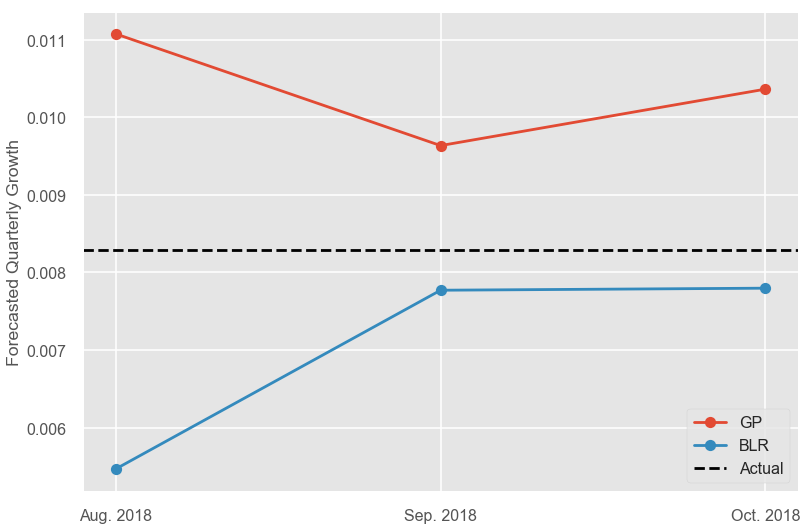

In [61]:
smoothed = pd.read_csv('nowcast.csv')

 

plt.style.use('seaborn-poster')

 

plt.ylabel('Forecasted Quarterly Growth')

plt.plot_date('date', 'GP', fmt = 'o', linestyle = '-', data = smoothed)

plt.plot_date('date', 'BLR', fmt = 'o', linestyle = '-', data = smoothed)

plt.axhline(gdp.value[113], label = 'Actual', c= 'black', linestyle = '--')

plt.legend()

plt.savefig('nowcast.png')